**1. CONVOLUTION PROCESS**

1. *   The dimensions of the input matrix X are 6x6.
   *   The dimensions of the kernel f are 3x3.
   *   The number of parameters in the kernel f are 9 (Each of the 9 elements is a parameter).

Code for calculating the output activation map for the given input matrix and kernel.

In [ ]:
# libraries used
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:


# Input matrix X
X = np.array([[7, 5, 0, 0, 3, 2],
              [6, 4, 5, 1, 4, 8],
              [9, 0, 2, 2, 5, 4],
              [6, 3, 4, 7, 9, 8],
              [5, 7, 5, 6, 9, 0],
              [7, 9, 0, 8, 2, 3]])

# Convolutional kernel f
f = np.array([[1, 0, -1],
              [2, 0, -2],
              [1, 0, -1]])

# Function to apply convolution without padding and stride 1
def convolve2d(X, f):
    # Get dimensions of input matrix and kernel
    X_rows, X_cols = X.shape
    f_rows, f_cols = f.shape

    # Calculate output dimensions
    out_rows = X_rows - f_rows + 1
    out_cols = X_cols - f_cols + 1

    # Initialize output matrix
    output = np.zeros((out_rows, out_cols))

    # Perform convolution
    for i in range(out_rows):
        for j in range(out_cols):
            # Extract the current region of the input matrix
            region = X[i:i+f_rows, j:j+f_cols]
            # Perform element-wise multiplication and sum the result
            output[i, j] = np.sum(region * f)

    return output

# Compute the output activation map
output_activation_map = convolve2d(X, f)

# Print the output
print("Output Activation Map:")
print(output_activation_map)

Output Activation Map:
[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]


2. Above is the output activation map which is a 4*4 matrix for stride 1 and no padding.

3. Below is the code for applying a max-pooling operation of 2x2 max pooling with stride 2 on the output activation map matrix.

In [ ]:

# Function to perform 2x2 max pooling with stride 2
def max_pooling(output_activation_map, pool_size=2, stride=2):
    # Get dimensions of the output activation map
    output_rows, output_cols = output_activation_map.shape

    # Calculate the dimensions of the pooled output
    pooled_rows = (output_rows - pool_size) // stride + 1
    pooled_cols = (output_cols - pool_size) // stride + 1

    # Initialize the pooled output matrix
    pooled_output = np.zeros((pooled_rows, pooled_cols))

    # Perform max pooling
    for i in range(0, pooled_rows):
        for j in range(0, pooled_cols):
            # Define the current region for pooling
            row_start = i * stride
            row_end = row_start + pool_size
            col_start = j * stride
            col_end = col_start + pool_size

            # Extract the region and apply max function
            pool_region = output_activation_map[row_start:row_end, col_start:col_end]
            pooled_output[i, j] = np.max(pool_region)

    return pooled_output

# Output activation map from the previous convolution operation
output_activation_map = convolve2d(X, f)

# Apply 2x2 max-pooling
pooled_output = max_pooling(output_activation_map)

# Print the pooled output
print("Pooled Output (after max-pooling):")
print(pooled_output)


Pooled Output (after max-pooling):
[[17. -4.]
 [11. 16.]]


**2. Convolution on MNIST**

**Preparing the MNIST dataset for evaluation**

In [3]:
# imports libraries
import tensorflow as tf
from tensorflow.keras import datasets, utils

# loads MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# reshape the data to include a channel dimension (for grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# one-hot encode the labels
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# set random seed for reproducibility
tf.random.set_seed(42)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


A regular CNN where the number of fliters in each layer increases as the depth of the network grows, i.e. the Lth layer will have more filters than the (L-1)th layer.
*   **Defining and creating the CNN model with increasing filters**



In [9]:
from tensorflow.keras import models, layers

# Define the CNN model with 10 convolutional layers
def create_model():
    model = models.Sequential()

    # Layer 1 (5 filters)
    model.add(layers.Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 1), padding="same"))

    # Layer 2 (6 filters)
    model.add(layers.Conv2D(6, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))

    # Layer 3 (7 filters)
    model.add(layers.Conv2D(7, (3, 3), activation='relu', padding="same"))

    # Layer 4 (8 filters)
    model.add(layers.Conv2D(8, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))

    # Layer 5 (9 filters)
    model.add(layers.Conv2D(9, (3, 3), activation='relu', padding="same"))

    # Layer 6 (10 filters)
    model.add(layers.Conv2D(10, (3, 3), activation='relu', padding="same"))

    # Layer 7 (11 filters)
    model.add(layers.Conv2D(11, (3, 3), activation='relu', padding="same"))

    # Layer 8 (12 filters)
    model.add(layers.Conv2D(12, (3, 3), activation='relu', padding="same"))

    # Layer 9 (13 filters)
    model.add(layers.Conv2D(13, (3, 3), activation='relu', padding="same"))

    # Layer 10 (14 filters)
    model.add(layers.Conv2D(14, (3, 3), activation='relu', padding="same"))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes (MNIST)

    return model

Compiling the model and training it using different hyperparameters for  regular CNN

In [11]:
# Define the hyperparameters to try
optimizers = ['SGD', 'Adam', 'RMSprop']
learning_rates = [0.01, 0.001]
batch_sizes = [64, 128]

# Store results in a dictionary
results = {}

# Loop over optimizers, learning rates, and batch sizes
for optimizer_name in optimizers:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            # Create a new instance of the model
            model = create_model()

            # Compile the model with the current optimizer and learning rate
            if optimizer_name == 'SGD':
                optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
            elif optimizer_name == 'Adam':
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            elif optimizer_name == 'RMSprop':
                optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

            model.compile(optimizer=optimizer,
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # Train the model
            history = model.fit(x_train, y_train,
                                batch_size=batch_size,
                                epochs=5,  # Use a small number of epochs to keep it quick
                                validation_data=(x_test, y_test),
                                verbose=0)  # Set verbose=0 for cleaner output

            # Evaluate the model on the test set
            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

            # Save the result
            key = f"Opt: {optimizer_name}, LR: {lr}, BS: {batch_size}"
            results[key] = test_acc
            print(f"Test accuracy for {key}: {test_acc:.4f}")

# Print the final results for all combinations
print("\nFinal Results for All Hyperparameter Combinations:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

Test accuracy for Opt: SGD, LR: 0.01, BS: 64: 0.9477
Test accuracy for Opt: SGD, LR: 0.01, BS: 128: 0.9507
Test accuracy for Opt: SGD, LR: 0.001, BS: 64: 0.1140
Test accuracy for Opt: SGD, LR: 0.001, BS: 128: 0.1663
Test accuracy for Opt: Adam, LR: 0.01, BS: 64: 0.1135
Test accuracy for Opt: Adam, LR: 0.01, BS: 128: 0.9651
Test accuracy for Opt: Adam, LR: 0.001, BS: 64: 0.9852
Test accuracy for Opt: Adam, LR: 0.001, BS: 128: 0.9840
Test accuracy for Opt: RMSprop, LR: 0.01, BS: 64: 0.1028
Test accuracy for Opt: RMSprop, LR: 0.01, BS: 128: 0.1028
Test accuracy for Opt: RMSprop, LR: 0.001, BS: 64: 0.9851
Test accuracy for Opt: RMSprop, LR: 0.001, BS: 128: 0.9857

Final Results for All Hyperparameter Combinations:
Opt: SGD, LR: 0.01, BS: 64: 0.9477
Opt: SGD, LR: 0.01, BS: 128: 0.9507
Opt: SGD, LR: 0.001, BS: 64: 0.1140
Opt: SGD, LR: 0.001, BS: 128: 0.1663
Opt: Adam, LR: 0.01, BS: 64: 0.1135
Opt: Adam, LR: 0.01, BS: 128: 0.9651
Opt: Adam, LR: 0.001, BS: 64: 0.9852
Opt: Adam, LR: 0.001, BS: 


**Observations for regular CNN model ***:
Effect of Optimizers: Adam and RMSprop clearly outperformed SGD with a learning rate of 0.001, as their adaptive nature allowed more effective convergence. While SGD performed well with a learning rate of 0.01, it struggled with smaller rates, likely due to needing longer training times to achieve comparable results.

Effect of Learning Rate: A learning rate of 0.001 consistently yielded better stability across optimizers, allowing controlled learning. Higher rates (0.01) led to instability with Adam and RMSprop, likely from too-large gradient updates.

Effect of Batch Size: For SGD, a larger batch size of 128 marginally improved performance, whereas Adam and RMSprop were less impacted by batch size at a 0.001 learning rate. This may be due to their adaptive properties making them less batch-sensitive, while SGD benefits from larger batches due to smoother gradient estimates.

Top Performers: Adam with a learning rate of 0.001 and batch size of 64 achieved the highest accuracy (0.9852), closely followed by RMSprop with a batch size of 128 (accuracy of 0.9857). Lower learning rates led to stable learning across optimizers, while SGD needed higher learning rates and larger batches to perform well. With more time, I would consider trying learning rate schedules or training longer to further improve accuracy.

**MODEL 2 : INVERTED CNN MODEL**

In [22]:
from tensorflow.keras import layers, models

# Define the inverted CNN model with decreasing filters and same padding
def create_inverted_model():
    inverted = models.Sequential([
        layers.Conv2D(15, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(14, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(13, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(11, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(10, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(9, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(7, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(6, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return inverted

In [24]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import numpy as np

# Define hyperparameters to try
optimizers = ['SGD', 'Adam', 'RMSprop']
learning_rates = [0.01, 0.001]
batch_sizes = [64, 128]
results = []

# Loop through each combination of hyperparameters
for optimizer_name in optimizers:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            # Create a new instance of the inverted model
            inverted = create_inverted_model()

            # Compile the model with the current optimizer and learning rate
            if optimizer_name == 'SGD':
                optimizer = SGD(learning_rate=lr)
            elif optimizer_name == 'Adam':
                optimizer = Adam(learning_rate=lr)
            else:  # RMSprop
                optimizer = RMSprop(learning_rate=lr)

            inverted.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            history = inverted.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)

            # Evaluate the model
            test_loss, test_acc = inverted.evaluate(x_test, y_test, verbose=0)
            results.append((optimizer_name, lr, batch_size, test_acc))

# Print final results for all hyperparameter combinations
for res in results:
    print(f'Opt: {res[0]}, LR: {res[1]}, BS: {res[2]}: Test Accuracy: {res[3]:.4f}')

Opt: SGD, LR: 0.01, BS: 64: Test Accuracy: 0.9577
Opt: SGD, LR: 0.01, BS: 128: Test Accuracy: 0.9281
Opt: SGD, LR: 0.001, BS: 64: Test Accuracy: 0.1376
Opt: SGD, LR: 0.001, BS: 128: Test Accuracy: 0.1207
Opt: Adam, LR: 0.01, BS: 64: Test Accuracy: 0.9522
Opt: Adam, LR: 0.01, BS: 128: Test Accuracy: 0.9582
Opt: Adam, LR: 0.001, BS: 64: Test Accuracy: 0.9797
Opt: Adam, LR: 0.001, BS: 128: Test Accuracy: 0.9816
Opt: RMSprop, LR: 0.01, BS: 64: Test Accuracy: 0.1135
Opt: RMSprop, LR: 0.01, BS: 128: Test Accuracy: 0.9631
Opt: RMSprop, LR: 0.001, BS: 64: Test Accuracy: 0.9832
Opt: RMSprop, LR: 0.001, BS: 128: Test Accuracy: 0.9819


**INVERTED MODEL OBSERVATIONS**

Optimizers: I found Adam and RMSprop outperformed SGD, especially with a 0.001 learning rate. Their adaptive adjustments helped the model converge much faster. SGD needed a higher learning rate (0.01) to do well, but it struggled with anything lower, probably because it requires more training time to catch up.

Learning Rate: Across the board, a 0.001 learning rate provided stable, effective training for all optimizers, while 0.01 often caused unstable updates. Both Adam and RMSprop handled 0.001 smoothly, but higher rates demanded careful tuning to avoid drops in accuracy.

Batch Size: Larger batches (128) slightly boosted SGD’s performance, probably from smoother gradient updates, while Adam and RMSprop weren’t as affected by batch size since they adjust parameters adaptively. They worked just as well with smaller batches.

Top Performers: RMSprop with a 0.001 learning rate and batch size of 128 achieved the highest accuracy (0.9819), closely followed by Adam with similar settings. Lower learning rates clearly worked best for stability, with adaptive optimizers benefiting the most.

In [1]:
from tensorflow.keras import layers, models

# Define the hourglass-shaped CNN model
def create_hourglass_model():
    hourglass = models.Sequential([
        layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(10, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(11, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(15, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(13, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(11, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(5, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return hourglass

In [5]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import numpy as np

# Define hyperparameters to try
optimizers = ['SGD', 'Adam', 'RMSprop']
learning_rates = [0.01, 0.001]
batch_sizes = [64, 128]
results = []

# Loop through each combination of hyperparameters
for optimizer_name in optimizers:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            # Create a new instance of the hourglass model
            hourglass = create_hourglass_model()

            # Compile the model with the current optimizer and learning rate
            if optimizer_name == 'SGD':
                optimizer = SGD(learning_rate=lr)
            elif optimizer_name == 'Adam':
                optimizer = Adam(learning_rate=lr)
            else:  # RMSprop
                optimizer = RMSprop(learning_rate=lr)

            hourglass.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            history = hourglass.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)

            # Evaluate the model
            test_loss, test_acc = hourglass.evaluate(x_test, y_test, verbose=0)
            results.append((optimizer_name, lr, batch_size, test_acc))

# Print final results for all hyperparameter combinations
for res in results:
    print(f'Opt: {res[0]}, LR: {res[1]}, BS: {res[2]}: Test Accuracy: {res[3]:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Opt: SGD, LR: 0.01, BS: 64: Test Accuracy: 0.9744
Opt: SGD, LR: 0.01, BS: 128: Test Accuracy: 0.9566
Opt: SGD, LR: 0.001, BS: 64: Test Accuracy: 0.1698
Opt: SGD, LR: 0.001, BS: 128: Test Accuracy: 0.1965
Opt: Adam, LR: 0.01, BS: 64: Test Accuracy: 0.1135
Opt: Adam, LR: 0.01, BS: 128: Test Accuracy: 0.9763
Opt: Adam, LR: 0.001, BS: 64: Test Accuracy: 0.9867
Opt: Adam, LR: 0.001, BS: 128: Test Accuracy: 0.9842
Opt: RMSprop, LR: 0.01, BS: 64: Test Accuracy: 0.1135
Opt: RMSprop, LR: 0.01, BS: 128: Test Accuracy: 0.1135
Opt: RMSprop, LR: 0.001, BS: 64: Test Accuracy: 0.9833
Opt: RMSprop, LR: 0.001, BS: 128: Test Accuracy: 0.9858


**HourGlass Model Observations**

Optimizers: Adam and RMSprop clearly outpaced SGD, especially with a 0.001 learning rate. Their ability to adaptively adjust learning rates allowed faster and more stable convergence. SGD only performed well with a higher learning rate (0.01) and tended to fall behind with smaller rates, likely because it requires more time to reach similar accuracy levels.

Learning Rate: The 0.001 learning rate consistently gave stable, solid performance across all optimizers. When increased to 0.01, training became less predictable, with accuracy sometimes dipping. Adam and RMSprop handled the 0.001 rate smoothly, but the higher rate demanded more fine-tuning to avoid drops in accuracy.

Batch Size: Larger batch sizes (128) gave SGD a slight boost, likely because of smoother gradient updates. Adam and RMSprop, however, weren’t as sensitive to batch size thanks to their adaptive adjustments, so they performed well even with smaller batches.

Top Performers: Adam and RMSprop with a 0.001 learning rate led the pack, achieving their best accuracy with batch sizes of 128 and 64, respectively. Lower learning rates were key for stability, and adaptive optimizers like Adam and RMSprop made the most of it, outperforming SGD on this setup.

**Convolution on CIFAR**

Implementing the LeNet CNN for CIFAR-10

In [6]:
# Imports
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to range [0, 1]
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot encode

# Define the LeNet model structure
def create_lenet_model():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), strides=1, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Conv2D(16, (5, 5), strides=1, activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Conv2D(120, (5, 5), activation='relu'),
        layers.Flatten(),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = create_lenet_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.3008 - loss: 1.8869 - val_accuracy: 0.4618 - val_loss: 1.4780
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4753 - loss: 1.4467 - val_accuracy: 0.5207 - val_loss: 1.3240
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.5251 - loss: 1.3210 - val_accuracy: 0.5452 - val_loss: 1.2628
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5586 - loss: 1.2419 - val_accuracy: 0.5561 - val_loss: 1.2374
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.5806 - loss: 1.1835 - val_accuracy: 0.5730 - val_loss: 1.1998
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.5948 - loss: 1.1393 - val_accuracy: 0.5754 - val_loss: 1.2032
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6078 - loss: 1.1039 - val_accuracy: 0.5787 - val_loss: 1.2026
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━

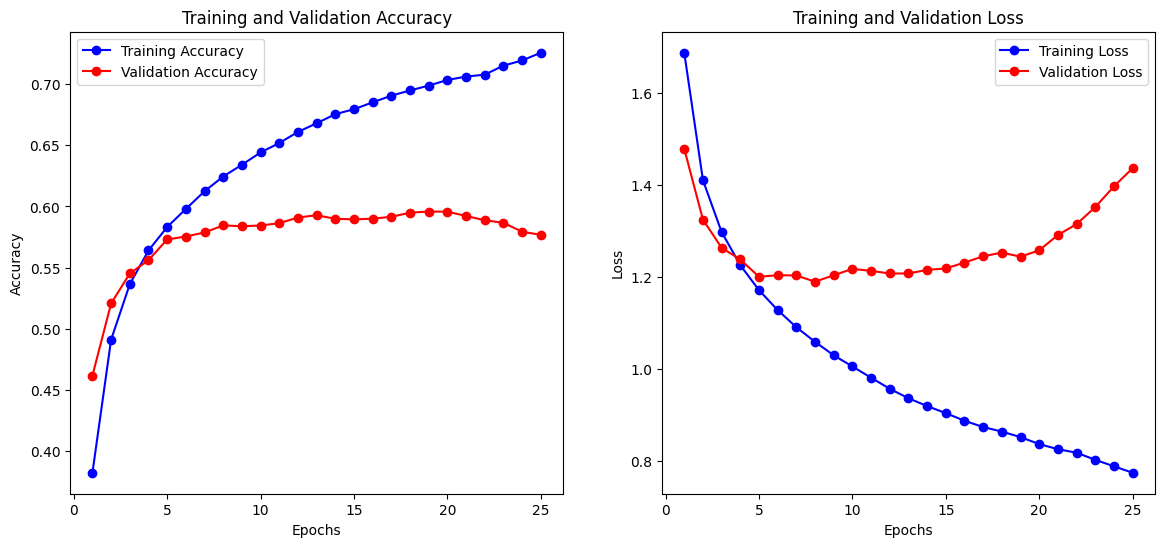

In [7]:
# Plot training & validation accuracy and loss over epochs
def plot_training_history(history):
    # Extract history for accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Training & Validation Accuracy
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function with the training history of LeNet
plot_training_history(history)


**1. Effect of learning rate on training process**

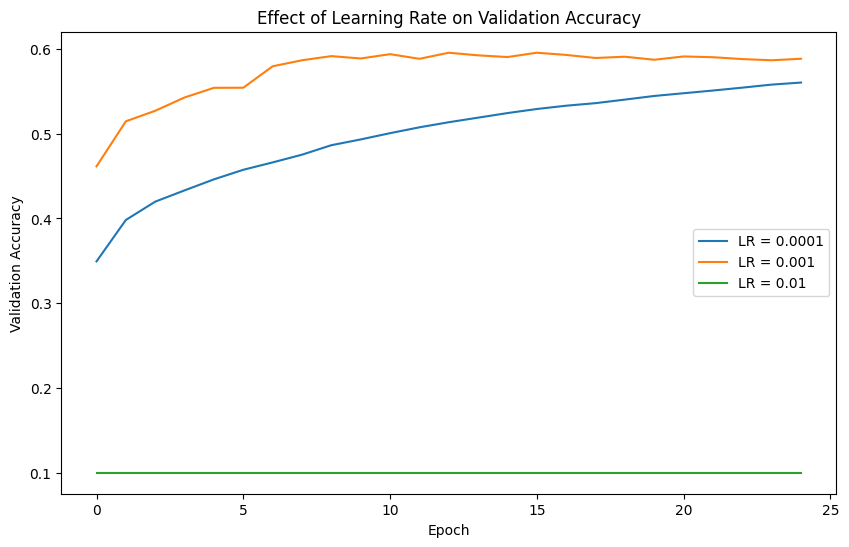

In [8]:
# Different learning rates for analysis
learning_rates = [0.0001, 0.001, 0.01]
lr_results = {}

for lr in learning_rates:
    # Compile and train with different learning rates
    model = create_lenet_model()
    model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test), verbose=0)

    # Store history for plotting
    lr_results[lr] = history.history['val_accuracy']

# Plot validation accuracy for each learning rate
plt.figure(figsize=(10, 6))
for lr, acc in lr_results.items():
    plt.plot(acc, label=f'LR = {lr}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Learning Rate on Validation Accuracy')
plt.legend()
plt.show()

In [15]:
for lr, acc in lr_results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {max(acc)}")

Learning Rate: 0.0001, Test Accuracy: 0.5602999925613403
Learning Rate: 0.001, Test Accuracy: 0.5954999923706055
Learning Rate: 0.01, Test Accuracy: 0.10000000149011612


The learning rate of 0.001 performed best, achieving 59.5% accuracy, as it balanced stability and efficient convergence. A higher rate of 0.01 led to poor performance (10% accuracy) due to instability, while a lower rate of 0.0001 achieved only 56%, likely converging too slowly. Hence, 0.001 was optimal, providing stable training and the best accuracy.

**2. Effect of batch size on the training process**


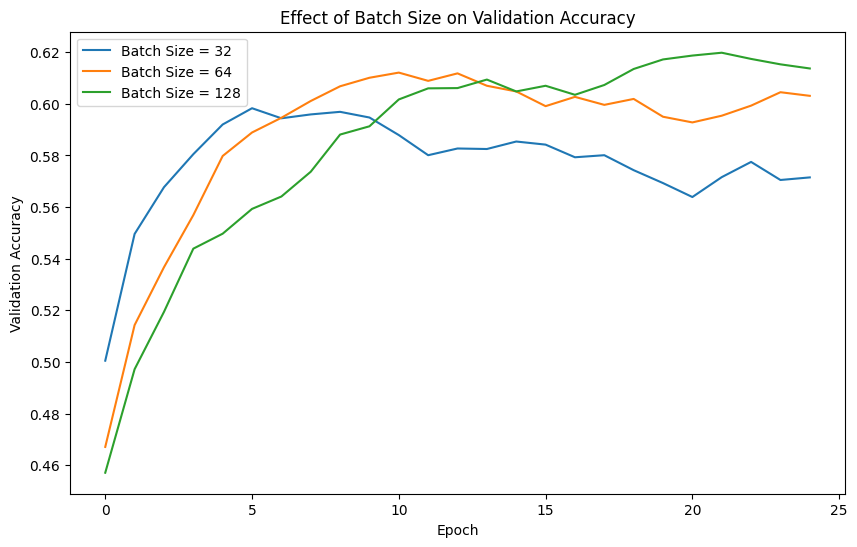

In [16]:
# Different batch sizes for analysis
batch_sizes = [32, 64, 128]
batch_results = {}

for bs in batch_sizes:
    # Compile and train with different batch sizes
    model = create_lenet_model()
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=25, batch_size=bs, validation_data=(x_test, y_test), verbose=0)

    # Store history for plotting
    batch_results[bs] = history.history['val_accuracy']

# Plot validation accuracy for each batch size
plt.figure(figsize=(10, 6))
for bs, acc in batch_results.items():
    plt.plot(acc, label=f'Batch Size = {bs}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Batch Size on Validation Accuracy')
plt.legend()
plt.show()

In [19]:
for bs, acc in batch_results.items():
    print(f"Batch Size: {bs}, Test Accuracy: {max(acc)}")

Batch Size: 32, Test Accuracy: 0.5982999801635742
Batch Size: 64, Test Accuracy: 0.6121000051498413
Batch Size: 128, Test Accuracy: 0.6197999715805054


As the batch size increased, test accuracy improved slightly, likely due to smoother gradient updates that help the model learn more effectively. Out of the options, a batch size of 128 gave the best results, reaching a test accuracy of around 61.98%.

**Hyperparameters to obtain the best accuracy on the test set**

In [3]:
# Imports
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to range [0, 1]
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot encode

# Define the LeNet model structure
def create_lenet_model():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), strides=1, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Conv2D(16, (5, 5), strides=1, activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Conv2D(120, (5, 5), activation='relu'),
        layers.Flatten(),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = create_lenet_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.3083 - loss: 1.8902 - val_accuracy: 0.4524 - val_loss: 1.5209
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.4682 - loss: 1.4726 - val_accuracy: 0.5015 - val_loss: 1.4010
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.5239 - loss: 1.3327 - val_accuracy: 0.5299 - val_loss: 1.3299
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.5491 - loss: 1.2609 - val_accuracy: 0.5446 - val_loss: 1.2803
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.5735 - loss: 1.2014 - val_accuracy: 0.5744 - val_loss: 1.1978
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5993 - loss: 1.1431 - val_accuracy: 0.5868 - val_loss: 1.1618
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.6070 - loss: 1.1083 - val_accuracy: 0.5879 - val_loss: 1.1662
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.6218 - loss: 1.0786 - 

In [4]:
# tracking best hyperparameters
best_acc = 0
best_params = {}

# Define hyperparameters to try
learning_rates = [0.001, 0.005]
batch_sizes = [64, 128]

# Loop through each combination of hyperparameters
for lr in learning_rates:
    for bs in batch_sizes:
        model = create_lenet_model()
        model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(x_train, y_train, epochs=25, batch_size=bs, validation_data=(x_test, y_test), verbose=0)

        # Get validation accuracy
        val_acc = history.history['val_accuracy'][-1]

        # Print current hyperparameters and validation accuracy
        print(f'Learning Rate: {lr}, Batch Size: {bs}, Validation Accuracy: {val_acc:.4f}')

        # Update best performance if this configuration is better
        if val_acc > best_acc:
            best_acc = val_acc
            best_params = {'learning_rate': lr, 'batch_size': bs}

# Print the best performance and parameters
print(f'\nBest Validation Accuracy: {best_acc:.4f}')
print(f'Best Hyperparameters: {best_params}')

Learning Rate: 0.001, Batch Size: 64, Validation Accuracy: 0.6242
Learning Rate: 0.001, Batch Size: 128, Validation Accuracy: 0.6155
Learning Rate: 0.005, Batch Size: 64, Validation Accuracy: 0.5835
Learning Rate: 0.005, Batch Size: 128, Validation Accuracy: 0.5648

Best Validation Accuracy: 0.6242
Best Hyperparameters: {'learning_rate': 0.001, 'batch_size': 64}


The best performance achieved a validation accuracy of 0.6242 with a learning rate of 0.001 and a batch size of 64. This combination worked well as the smaller learning rate provided stable, gradual updates, allowing the model to converge effectively, while the moderate batch size balanced convergence speed and gradient stability.

**4. Dense feed forward network on CIFAR10 dataset**

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define the equivalent fully connected model function
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(6, activation='relu'))    # Equivalent to first conv layer with 6 filters
    model.add(Dense(16, activation='relu'))   # Equivalent to second conv layer with 16 filters
    model.add(Dense(120, activation='relu'))  # Equivalent to third conv layer with 120 filters
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons
    return model

# Define hyperparameters
batch_sizes = [64, 128]
learning_rates = [0.001, 0.005]
results = []

# Loop over each combination of batch size and learning rate
for batch_size in batch_sizes:
    for lr in learning_rates:
        # Create and compile the model
        model = create_model()
        model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model and store the history
        history = model.fit(x_train, y_train, epochs=25, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)

        # Get the last epoch validation accuracy
        final_accuracy = history.history['val_accuracy'][-1]

        # Append the results
        results.append({
            'batch_size': batch_size,
            'learning_rate': lr,
            'accuracy': final_accuracy,
        })

        # Print the combination parameters and their accuracy
        print(f"Batch Size: {batch_size}, Learning Rate: {lr}, Final Validation Accuracy: {final_accuracy:.4f}")

# Convert results to a NumPy array for easier handling later
results_array = np.array([[res['batch_size'], res['learning_rate'], res['accuracy']] for res in results])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Size: 64, Learning Rate: 0.001, Final Validation Accuracy: 0.1000
Batch Size: 64, Learning Rate: 0.005, Final Validation Accuracy: 0.1000
Batch Size: 128, Learning Rate: 0.001, Final Validation Accuracy: 0.2115
Batch Size: 128, Learning Rate: 0.005, Final Validation Accuracy: 0.1000


In [10]:
lenet_model = create_lenet_model()
dense_model = create_model()

# Check the number of parameters
print("LeNet Model Summary:")
lenet_model.summary()

print("\nDense Network Model Summary:")
dense_model.summary()

LeNet Model Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)


Dense Network Model Summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │          18,438 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 120)                 │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,604 (123.45 KB)

 Trainable params: 31,604 (123.45 KB)

 Non-trainable params: 0 (0.00 B)

**Performance:**

The Dense network didn't perform very well, with its best accuracy sitting at just 0.2115 (when using a batch size of 128 and a learning rate of 0.001). On the other hand, the LeNet model really shone, achieving an accuracy of 0.6242 under similar conditions. This shows that the LeNet architecture is much better suited for handling the CIFAR-10 dataset. Its convolutional layers are great at picking up the important features in the images, which makes a big difference in performance.

**Parameters in dense network compared to the LeNet**

When we look at the numbers, the LeNet model has 62,006 parameters, while the Dense network has 31,604 parameters. Even though the LeNet has more parameters, it's still quite efficient given its ability to learn from the data. The Dense network is simpler and has fewer parameters, but it just doesn't seem to have the complexity needed to tackle this specific task effectively.

**Are they worth it?**

Given the results, the extra parameters in the LeNet model seem well worth it. The higher accuracy it achieved indicates that its structure is more effective for extracting features from images, which is crucial for this kind of work. While the Dense network is easier to set up and has fewer parameters, it really falls short in performance for the CIFAR-10 dataset. This highlights how important it is to choose the right model for the job—convolutional networks like LeNet are specifically designed for image classification, making them a better fit here.